In [1]:
## Linear Regression in TF
import tensorflow as tf
import numpy as np
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

Loss val ist : 290.102203
y = 0.18x + 0.00
Loss val ist : 243.307129
y = 0.28x + 0.10
Loss val ist : 155.152344
y = 0.37x + 0.19
Loss val ist : 127.804291
y = 0.46x + 0.28
Loss val ist : 105.061401
y = 0.53x + 0.36
Loss val ist : 78.459015
y = 0.61x + 0.43
Loss val ist : 68.231079
y = 0.67x + 0.50
Loss val ist : 49.985836
y = 0.73x + 0.56
Loss val ist : 42.738098
y = 0.79x + 0.61
Loss val ist : 32.110626
y = 0.83x + 0.66


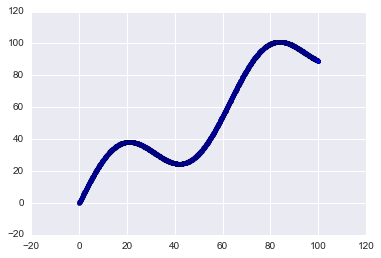

In [2]:
weight,bias = 0,0
output_dir = '/Users/ahartens/Desktop/tryTf'

graph = tf.Graph()
with graph.as_default(),tf.device('/cpu:0'):
    
    # make the data
    x_data = np.arange(100,step=.1)
    y_data = x_data+np.sin(x_data/10)*20

    # plot the data
    plt.scatter(x_data,y_data)

    n_samples = 1000
    batch_size = 100

    x_data = np.reshape(x_data,(n_samples,1))
    y_data = np.reshape(y_data,(n_samples,1))

    x = tf.placeholder(tf.float32,shape=(batch_size,1))
    y = tf.placeholder(tf.float32,shape=(batch_size,1))

    with tf.variable_scope("linear-regression"):
        w = tf.get_variable("weights",(1,1),
                            initializer = tf.random_normal_initializer())
        b = tf.get_variable("bias",(1,),
                            initializer=tf.constant_initializer(0.0))
        y_pred = tf.matmul(x,w) + b
        loss = tf.reduce_sum((y-y_pred)**2/n_samples)
        tf.scalar_summary("myLossOperation",loss)
        tf.histogram_summary("weight", w)
        tf.histogram_summary("bias", b)
        tf.histogram_summary("loss", loss)


    opt_operation = tf.train.AdamOptimizer().minimize(loss)

    summary_op = tf.merge_all_summaries()

with tf.Session(graph=graph) as sess:
    summary_writer = tf.train.SummaryWriter(output_dir,sess.graph)
    sess.run(tf.initialize_all_variables())

    for i in range(1000):
        indices = np.random.choice(n_samples,batch_size)
        x_batch,y_batch = x_data[indices], y_data[indices]
        myFeedDict = {x:x_batch,y:y_batch}
        _,loss_val,weight,bias,summary_str = sess.run([opt_operation,loss,w,b,summary_op],
                             feed_dict = myFeedDict)
        summary_writer.add_summary(summary_str)
        summary_writer.flush()
        if (i%100 == 0):
            print("Loss val ist : %f"%loss_val)
            print("y = %0.2fx + %0.2f"%(weight,bias))
            

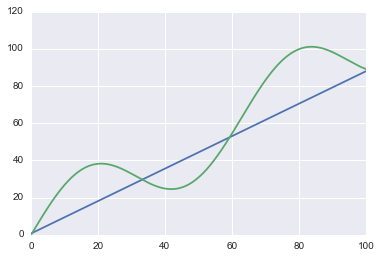

In [3]:
plt.plot(x_data,x_data*weight+bias)
plt.plot(x_data,y_data)
plt.show()